#### Importing Relevent Liberaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Task #1 : Merge 12 months of data into single file

In [4]:
files = [file for file in os.listdir('./Sales_Data') if not file.startswith('.')] #get all files as a list ad ignore hidden files

path = './Sales_Data'

all_months_data = pd.DataFrame() 

for file in files:
    df = pd.read_csv(path + '/' + file) #note /
    all_months_data = pd.concat([all_months_data, df])
    
# all_months_data
all_months_data.to_csv('all_data.csv', index = False)

    
# df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
# df.head()

#### Read the updated csv file

In [5]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up data !

#### Drop rows of NaN

In [12]:
# #find all NaN
# nan_df = all_data[all_data.isna().any(axis = 1)]
# display(nan_df.head())

all_data = all_data.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### Find Or and delete it

In [10]:
# invalid literal for int() with base 10: 'Or' so exploring on this error
# temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] #just remove which are not


#### Changing columns to correct type

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augment data with more columns

#### Task 02 - Add month columns

In [13]:
all_data['month'] = all_data['Order Date'].str[0:2]

all_data['month'] = all_data['month'].astype('int32')

all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task #03  - Add sales column

In [14]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task #04 - Add a city columns

In [15]:
#using apply method for same
def get_city(x):
    return x.split(',')[1]
def get_state(x):
    return x.split(',')[2].split(' ')[1]

all_data['city'] = all_data['Purchase Address'].apply(lambda x:f'{get_city(x)} ({get_state(x)})')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


### Data Exploration

#### Question 1: What was best month for sales? How much was earned that month?

In [17]:
sales_res = all_data.groupby('month').Sales.sum()

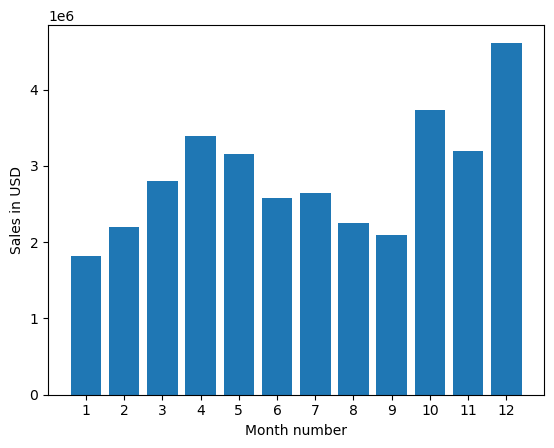

In [18]:
months = range(1,13)

plt.bar(months, sales_res)

plt.xticks(months) #some how this is not working 

plt.ylabel("Sales in USD")
plt.xlabel('Month number')
plt.show()

#### Question 2: What city has maximum number of Sales ?

In [19]:
results = all_data.groupby('city').sum()

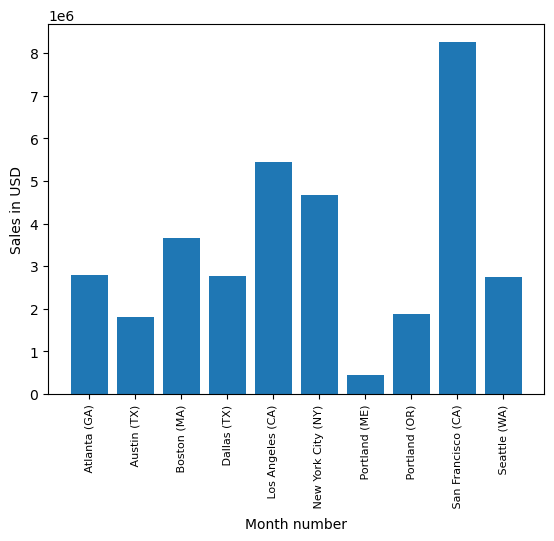

In [20]:
months = range(1,13)

cities = [city for city,df in all_data.groupby('city')]
plt.bar(cities, results.Sales)

plt.ylabel("Sales in USD")
plt.xlabel('Month number')
plt.xticks(cities, rotation = 90 , size = 8)

plt.show()

#### Question 3: What time should we display advertisement to maximise likelihood of cosumer buying product

In [22]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [23]:
all_data['hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['min'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hour,min,count
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


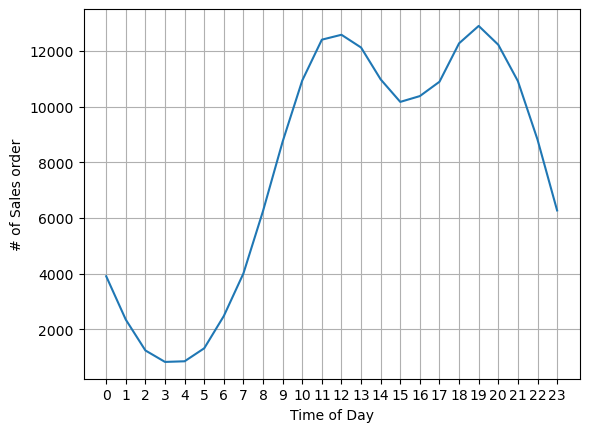

In [24]:
hours = [hour for hour,df in all_data.groupby('hour')]
# print(hours)

plt.plot(hours, all_data.groupby('hour').count()['count'])
# all_data.groupby('hour').count()

plt.xticks(hours)
plt.xlabel('Time of Day')
plt.ylabel('# of Sales order')
plt.grid()

#### Question 4: What products are oftensold together?

In [26]:
# if same order id than they are sold together
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2 = df[['Order ID', 'grouped']].drop_duplicates()


C:\Users\Anand\AppData\Local\Temp\ipykernel_2944\900595546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [27]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product is sold more and Why are they sold most?

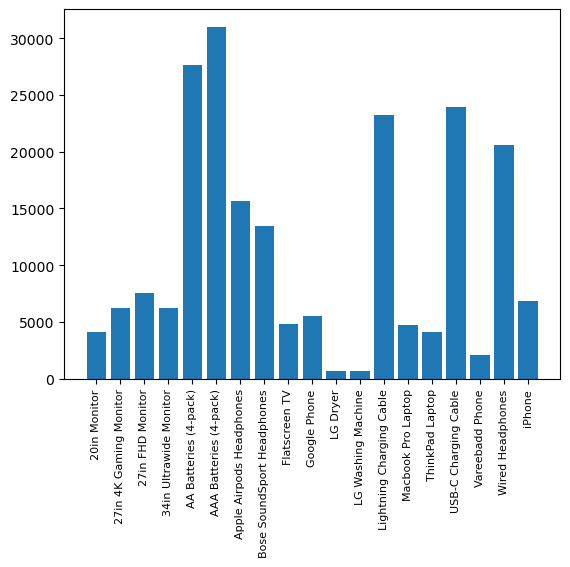

In [52]:
new_data = all_data.drop(columns = ['Order Date']) # date type data is not working if we need to sum ahead

product_grouped = new_data.groupby('Product')
quantity_grouped = product_grouped.sum()['Quantity Ordered']

products = [product for product, df in product_grouped]
plt.bar(products, quantity_grouped)

plt.xticks(products, rotation = 90, size = 8)
plt.show()


C:\Users\Anand\AppData\Local\Temp\ipykernel_2944\1779780898.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\Anand\AppData\Local\Temp\ipykernel_2944\1779780898.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


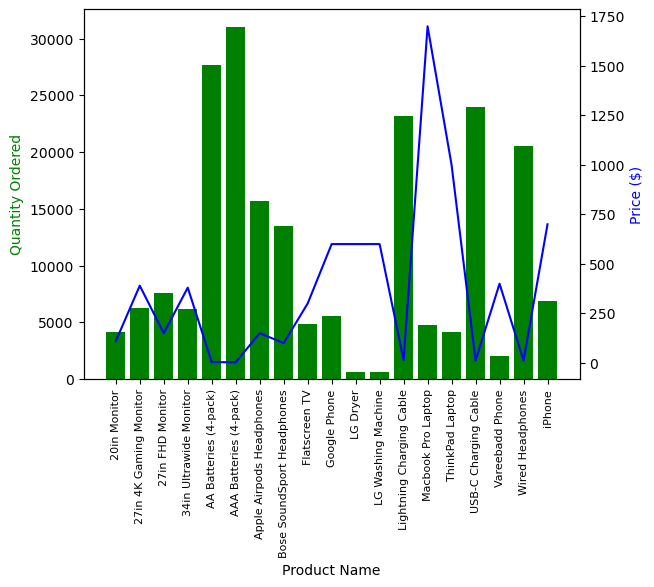

In [73]:
# Now why? -> because it looks they are cheap

all_data_numeric = all_data.select_dtypes(include = [np.number])
all_data_numeric['Product'] = all_data['Product']
prices = all_data_numeric.groupby('Product').mean()['Price Each']

#now we will add a second right hand axis in matplotlib chart
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_grouped, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()
